In [1]:
import pandas as pd

df_grd = pd.read_csv('C:/Users/Rodrigo/OneDrive/Escritorio/UNAB/Clases_apuntes/Tópico de ciencia de datos/dataset_elpino.csv', sep=";")

In [2]:
###### Tratar columna GRD

In [3]:
df_grd[['Categoria', 'Identificador', 'Gravedad', 'Tipo', 'Descripcion']] = df_grd['GRD'].str.extract(
    r'^\s*(\d{2})(\d{3})(\d)\s*-\s*(\w+)\s*(.*)$'
)
print(df_grd[['GRD', 'Categoria', 'Identificador', 'Gravedad', 'Tipo', 'Descripcion']].head())

                                                 GRD Categoria Identificador  \
0                       184103 - MH SEPTICEMIA W/MCC        18           410   
1  041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...        04           101   
2  041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...        04           101   
3  041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...        04           102   
4  041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...        04           102   

  Gravedad Tipo                                        Descripcion  
0        3   MH                                   SEPTICEMIA W/MCC  
1        3   PH  ECMO VENTILACIÓN MECÁNICA PROLONGADA CON TRAQU...  
2        3   PH  ECMO VENTILACIÓN MECÁNICA PROLONGADA CON TRAQU...  
3        3   PH  VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTO...  
4        3   PH  VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTO...  


In [4]:
######Validad datos de sexo y edad

In [5]:
unique_sex = df_grd['Sexo (Desc)'].unique()
age_range = (df_grd['Edad en años'].min(), df_grd['Edad en años'].max())

unique_sex, age_range

(array(['Hombre', 'Mujer'], dtype=object), (0, 121))

In [6]:
###### Asegurarse de identificar columnas vacías como NaN

In [7]:
columns_to_check = [col for col in df_grd.columns if 'Diag' in col or 'Proced' in col]
df_grd[columns_to_check] = df_grd[columns_to_check].replace(['', ' ', 'NA', 'N/A'], pd.NA)

df_grd[columns_to_check].isnull().sum()

Diag 01 Principal (cod+des)       0
Diag 02 Secundario (cod+des)      0
Diag 03 Secundario (cod+des)      0
Diag 04 Secundario (cod+des)      0
Diag 05 Secundario (cod+des)      0
                                 ..
Proced 26 Secundario (cod+des)    0
Proced 27 Secundario (cod+des)    0
Proced 28 Secundario (cod+des)    0
Proced 29 Secundario (cod+des)    0
Proced 30 Secundario (cod+des)    0
Length: 65, dtype: int64

In [8]:
###### Procesar diagnósticos y Procedimientos

In [9]:
if 'diag_proced_columns' not in locals():
    diag_proced_columns = [col for col in df_grd.columns if 'Diag' in col or 'Proced' in col]

new_columns = {}
for col in diag_proced_columns:
    new_columns[f'{col}_Code'] = df_grd[col].str.extract(r'^([\w\d.]+)')[0]
    new_columns[f'{col}_Desc'] = df_grd[col].str.extract(r'-\s*(.*)')[0]

df_grd = pd.concat([df_grd, pd.DataFrame(new_columns)], axis=1)

df_grd.head()

,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 26 Secundario (cod+des)_Code,Proced 26 Secundario (cod+des)_Desc,Proced 27 Secundario (cod+des)_Code,Proced 27 Secundario (cod+des)_Desc,Proced 28 Secundario (cod+des)_Code,Proced 28 Secundario (cod+des)_Desc,Proced 29 Secundario (cod+des)_Code,Proced 29 Secundario (cod+des)_Desc,Proced 30 Secundario (cod+des)_Code,Proced 30 Secundario (cod+des)_Desc
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, válvula no especificada,...",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] ...,L89.9 - Úlcera de decúbito y area de presión n...,L08.9 - Infección local de la piel y del tejid...,B96.2 - Escherichia coli [E. coli] como causa ...,A41.5 - Sepsis por otros organnismos Gram nega...,J86.9 - Piotórax sin fístula,...,90.42,EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO,90.52,EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39,EXAMEN MICROSCOPICO URINARIO INFERIOR.OTRO,91.33,EXAMEN MICROSCOPICO URINARIO INFERIOR.CULTIVO ...,87.03,TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA
1,"U07.1 - COVID-19, virus identificado",J12.8 - Neumonía debida a otros virus,R06.0 - Disnea,R05 - Tos,"R50.9 - Fiebre, no especificada",Z29.0 - Aislamiento,Z01.7 - Examen de laboratorio,"J96.00 - Insuficiencia respiratoria aguda, Tip...",J94.2 - Hemotórax,J92.9 - Paquipleuritis sin asbestosis,...,91.39,EXAMEN MICROSCOPICO URINARIO INFERIOR.OTRO,90.52,EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.32,EXAMEN MICROSCOPICO URINARIO INFERIOR.CULTIVO,96.59,IRRIGACION HERIDA OTRA,90.99,EXAMEN MICROSCOPICO DIGESTIVO INFERIOR.OTRO
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock séptico,R57.1 - Choque hipovolémico,J80 - Síndrome de dificultad respiratoria del ...,Y95 - Afección nosocomial,J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,B95.6 - Staphylococcus aureus como causa de en...,B96.8 - Otros agentes bacterianos especificado...,B37.1 - Candidiasis pulmonar,...,90.53,EXAMEN MICROSCOPICO SANGRE.CULTIVO Y SENSIBILIDAD,99.26,INYECCION TRANQUILIZANTE,89.39,OTRAS MEDICIONES Y EXAMENES NO QUIRURGICOS,89.66,GASOMETRIA VENA,89.65,GASOMETRIA ARTERIA
3,K76.8 - Otras enfermedades especificadas del h...,K66.1 - Hemoperitoneo,"N18.5 - Enfermedad renal crónica, estadio 5",D64.9 - Anemia de tipo no especificado,E87.5 - Hiperpotasemia,E87.2 - Acidosis,J81 - Edema pulmonar,N17.8 - Otras insuficiencias renales agudas,J44.9 - Enfermedad pulmonar obstructiva crónic...,R41.0 - Desorientación no especificada,...,00.17,INFUSON AGENTE VASOPRESOR,99.04,TRANSFUSION CONCENTRADO HEMATIES,99.18,INYECCION ELECTROLITO,99.21,INYECCION ANTIBIOTICO,99.23,INYECCION ESTEROIDE
4,T81.0 - Hemorragia y hematoma que complican un...,"Y83.2 - Operación quirúrgica con anastomosis, ...",S31.1 - Herida de la pared abdominal,S36.80 - Traumatismo de otros órganos intraabd...,W31.62 - Contacto traumático con otras maquina...,"J96.09 - Insuficiencia respiratoria aguda, Tip...",J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,"U07.1 - COVID-19, virus identificado","N39.0 - Infección de vías urinarias, sitio no ...",...,91.32,EXAMEN MICROSCOPICO URINARIO INFERIOR.CULTIVO,93.90,RESPIRACION PRESION POSITIVA CONTINUA [RPPC],99.15,INFUSION PARENTERAL SUSTANCIA NUTRITIVA CONCEN...,96.59,IRRIGACION HERIDA OTRA,45.13,ESOFAGOGASTRODUODENOSCOPIA [EGD]


In [10]:
###### Buscar diagnósticos principales más frecuentes

In [11]:
# Ver los primeros 5 valores de la columna
df_grd['Diag 01 Principal (cod+des)_Code'].head()

0    A41.8
1    U07.1
2    K56.5
3    K76.8
4    T81.0
Name: Diag 01 Principal (cod+des)_Code, dtype: object

In [12]:
# Buscar columnas duplicadas en el DataFrame
duplicated_columns = df_grd.columns[df_grd.columns.duplicated()]
duplicated_columns

Index([], dtype='object')

In [13]:
# Inspeccionar el tipo de dato de la columna
df_grd['Diag 01 Principal (cod+des)_Code'].apply(type).value_counts()

Diag 01 Principal (cod+des)_Code
<class 'str'>    14561
Name: count, dtype: int64

In [14]:
# Detectar columnas duplicadas
duplicated_columns = df_grd.columns.duplicated()
duplicated_columns.sum()  # Muestra cuántas columnas están duplicadas

0

In [15]:
# Revisar valores únicos y faltantes en la columna
df_grd['Diag 01 Principal (cod+des)_Code'].isna().sum(), df_grd['Diag 01 Principal (cod+des)_Code'].nunique()

(0, 1491)

In [16]:
df_grd_cleaned = df_grd.loc[:, ~df_grd.columns.duplicated()]
df_grd_cleaned['Diag 01 Principal (cod+des)_Code'].value_counts().head(10)

Diag 01 Principal (cod+des)_Code
O70.0    779
O80.0    471
U07.1    327
O34.2    304
E11.5    215
K35.8    208
N10      189
K80.2    184
N39.0    180
I63.8    166
Name: count, dtype: int64

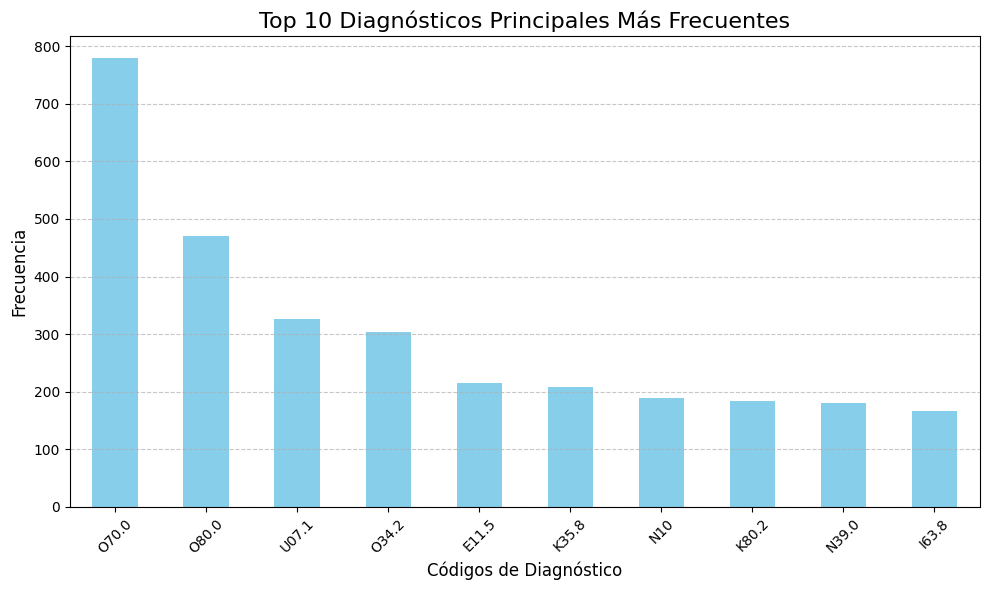

In [17]:
import matplotlib.pyplot as plt

top_diag = df_grd_cleaned['Diag 01 Principal (cod+des)_Code'].value_counts().head(10)
top_diag.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Diagnósticos Principales Más Frecuentes', fontsize=16)
plt.xlabel('Códigos de Diagnóstico', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [18]:
###### Relación de frecuencia diagnóstico y procedimeinto

In [19]:
diagnostico_frecuente = 'O70.0'
procedimientos_diag = df_grd_cleaned[df_grd_cleaned['Diag 01 Principal (cod+des)_Code'] == diagnostico_frecuente]

top_procedimientos = procedimientos_diag['Proced 01 Principal (cod+des)_Code'].value_counts().head(10)

top_procedimientos

Proced 01 Principal (cod+des)_Code
73.59    762
75.69     11
72.9       1
72.1       1
66.32      1
73.99      1
74.1       1
72.0       1
Name: count, dtype: int64

In [20]:
###### Otros diagnósticos

In [21]:
procedimientos_o80 = df_grd_cleaned[df_grd_cleaned['Diag 01 Principal (cod+des)_Code'] == 'O80.0']
top_procedimientos_o80 = procedimientos_o80['Proced 01 Principal (cod+des)_Code'].value_counts().head(10)

procedimientos_u07 = df_grd_cleaned[df_grd_cleaned['Diag 01 Principal (cod+des)_Code'] == 'U07.1']
top_procedimientos_u07 = procedimientos_u07['Proced 01 Principal (cod+des)_Code'].value_counts().head(10)

top_procedimientos_o80, top_procedimientos_u07

(Proced 01 Principal (cod+des)_Code
 73.59    470
 73.91      1
 Name: count, dtype: int64,
 Proced 01 Principal (cod+des)_Code
 87.41    102
 96.72     56
 93.90     32
 87.44     29
 96.71     19
 31.1      17
 88.43     14
 87.03     12
 90.39      8
 96.70      3
 Name: count, dtype: int64)

In [22]:
###### Visualización

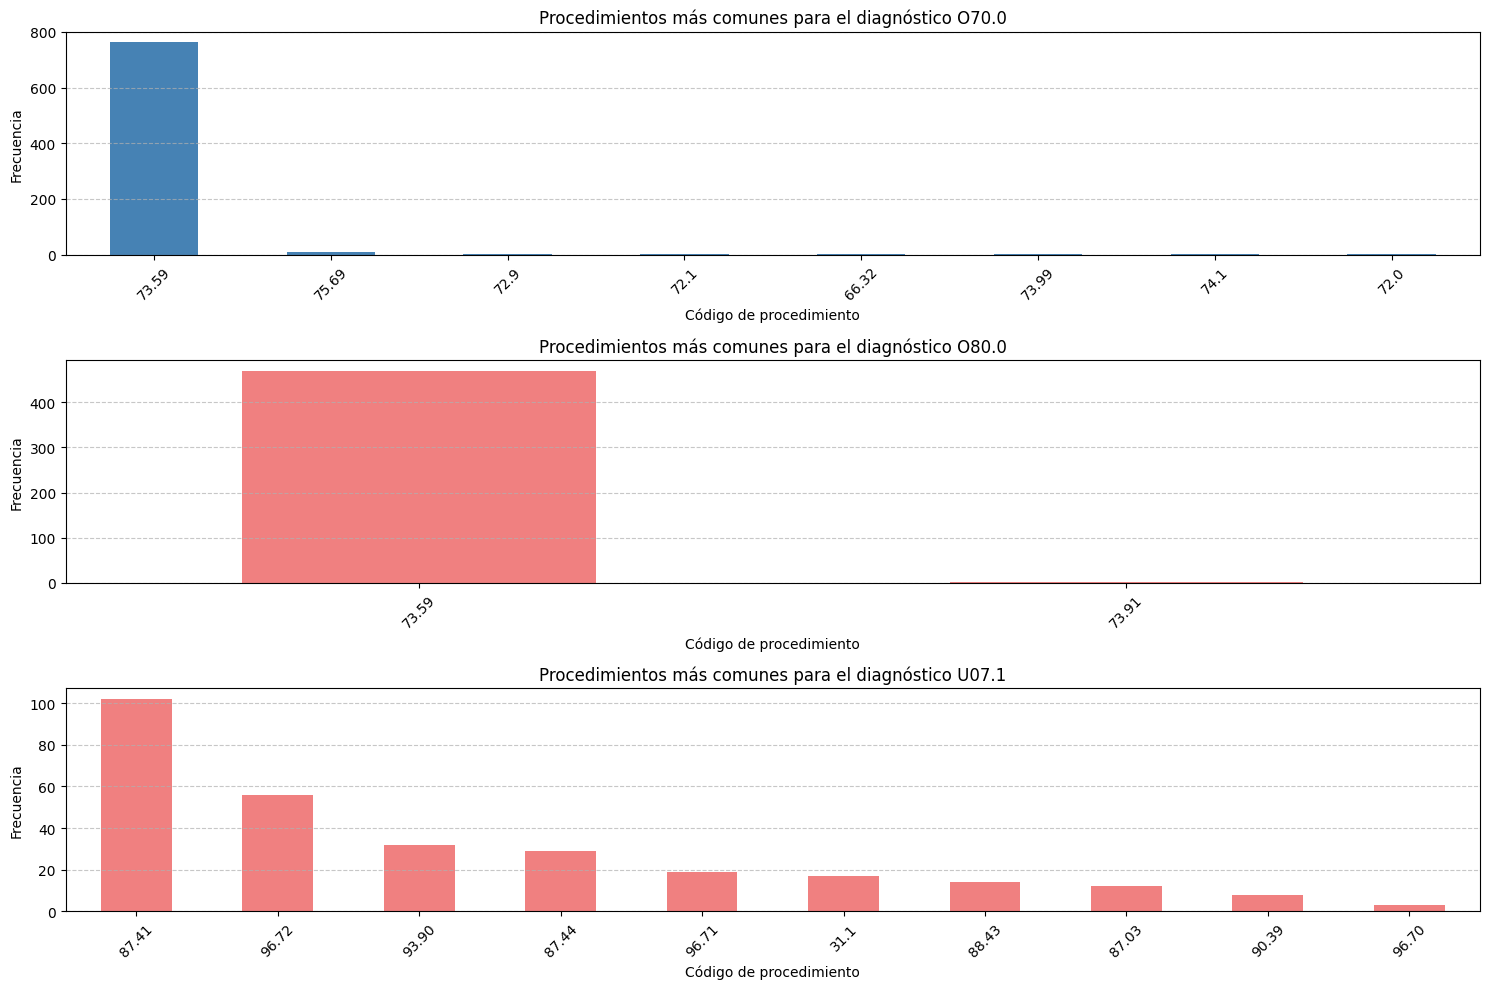

In [23]:
procedimientos_o70 = df_grd_cleaned[df_grd_cleaned['Diag 01 Principal (cod+des)_Code'] == 'O70.0']
top_procedimientos_o70 = procedimientos_o70['Proced 01 Principal (cod+des)_Code'].value_counts().head(10)

procedimientos_diagnosticos = {
    'O70.0': top_procedimientos_o70,
    'O80.0': top_procedimientos_o80,
    'U07.1': top_procedimientos_u07,
}

plt.figure(figsize=(15, 10))

for i, (diagnostico, procedimientos) in enumerate(procedimientos_diagnosticos.items(), 1):
    plt.subplot(3, 1, i)
    procedimientos.plot(kind='bar', color='steelblue' if diagnostico == 'O70.0' else 'lightcoral')
    plt.title(f'Procedimientos más comunes para el diagnóstico {diagnostico}')
    plt.xlabel('Código de procedimiento')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [24]:
###### Verificar 73.59

In [25]:
procedimiento_7359 = df_grd_cleaned[df_grd_cleaned['Proced 01 Principal (cod+des)_Code'] == '73.59']

diagnosticos_7359 = procedimiento_7359['Diag 01 Principal (cod+des)_Code'].value_counts()

diagnosticos_7359

Diag 01 Principal (cod+des)_Code
O70.0    762
O80.0    470
O70.1     62
O98.5     58
O24.4     27
O42.0     26
O69.8     26
O60.1     25
O36.5     18
O83.8     18
O68.1     18
O26.0     15
O41.0      9
O36.4      7
O70.9      7
O62.3      6
O99.0      6
O14.0      5
O36.6      4
O48        4
O99.2      4
O69.3      4
O14.1      4
O64.8      3
O62.1      3
O42.1      3
O81.0      3
O75.7      3
O13        3
O69.1      3
O64.4      3
O72.2      3
O71.3      3
O70.2      3
O62.2      2
O98.1      2
O33.5      2
O99.3      2
O71.4      2
O11        2
O73.1      2
O99.8      1
O99.4      1
O75.0      1
O81.3      1
O46.9      1
O14.9      1
O72.1      1
O99.5      1
U07.1      1
O75.6      1
O36.0      1
O68.2      1
O34.2      1
O45.9      1
O71.2      1
O73.0      1
Name: count, dtype: int64

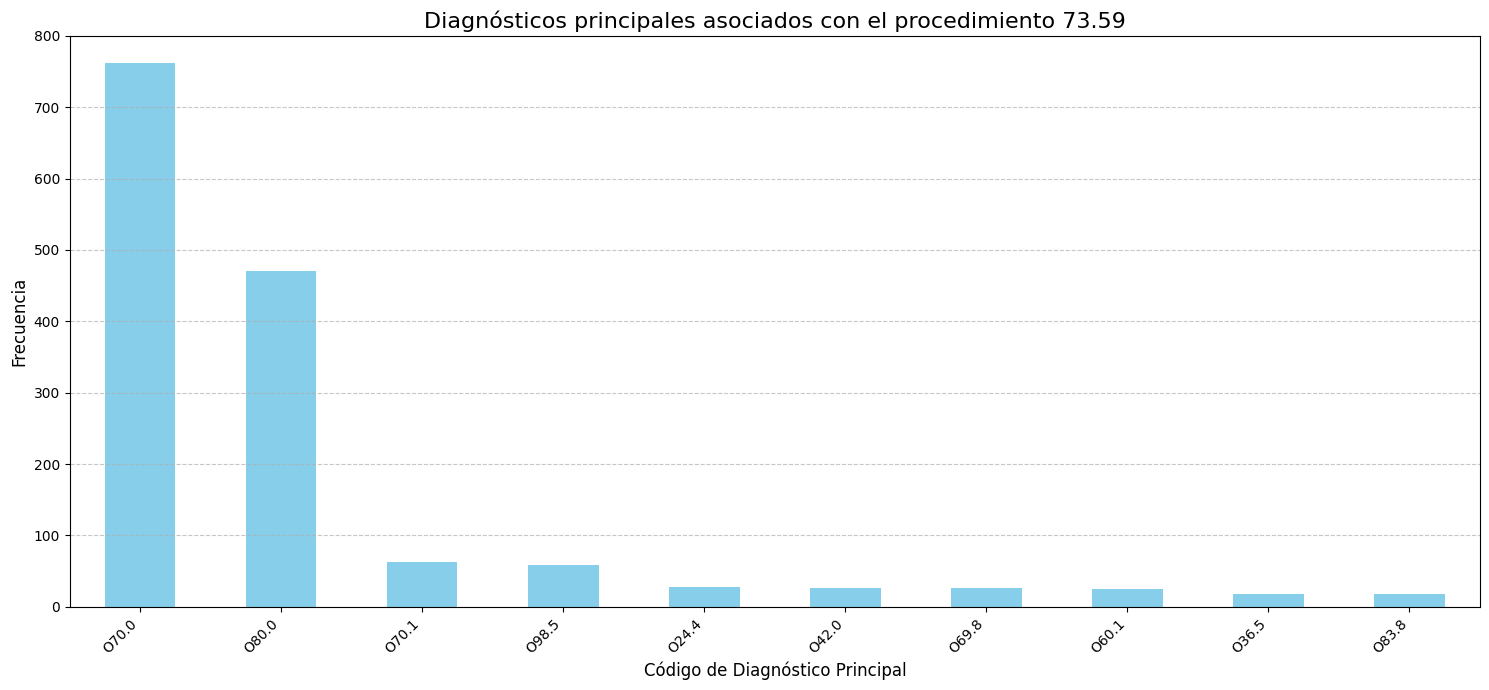

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
diagnosticos_7359.head(10).plot(kind='bar', color='skyblue')

plt.title("Diagnósticos principales asociados con el procedimiento 73.59", fontsize=16)
plt.xlabel("Código de Diagnóstico Principal", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
###### Análisis de otroas variables

<Axes: title={'center': 'Distribución de diagnósticos (Top 10) por tipo'}, xlabel='Diag 01 Principal (cod+des)_Code'>

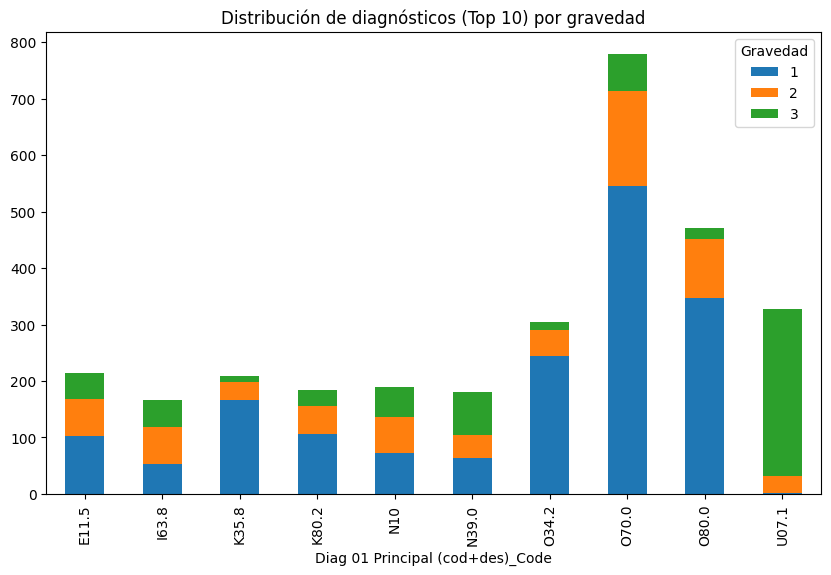

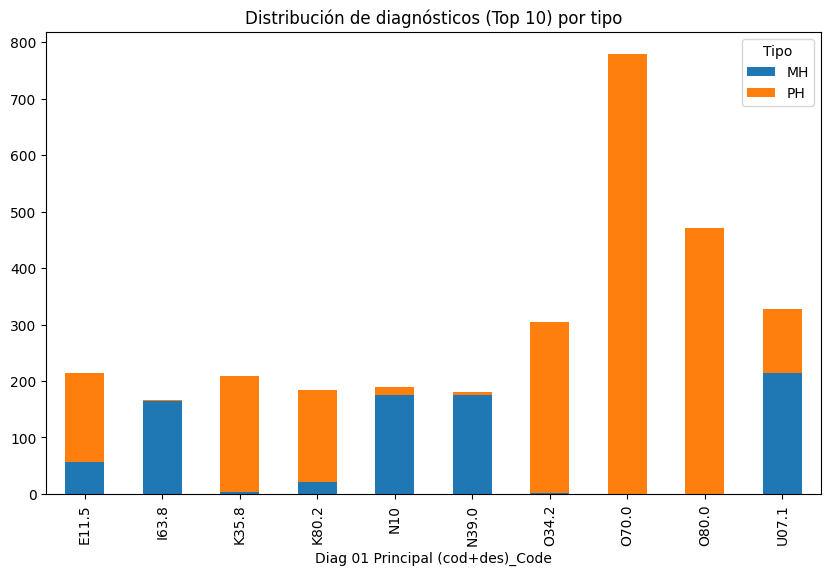

In [28]:
df_grd = df_grd.loc[:, ~df_grd.columns.duplicated()]
top_diagnosticos = df_grd['Diag 01 Principal (cod+des)_Code'].value_counts().head(10).index

df_top = df_grd[df_grd['Diag 01 Principal (cod+des)_Code'].isin(top_diagnosticos)]

diag_vs_gravity = df_top.groupby(['Diag 01 Principal (cod+des)_Code', 'Gravedad']).size().unstack(fill_value=0)
diag_vs_type = df_top.groupby(['Diag 01 Principal (cod+des)_Code', 'Tipo']).size().unstack(fill_value=0)

diag_vs_gravity.plot(kind='bar', stacked=True, figsize=(10, 6), title="Distribución de diagnósticos (Top 10) por gravedad")
diag_vs_type.plot(kind='bar', stacked=True, figsize=(10, 6), title="Distribución de diagnósticos (Top 10) por tipo")

In [29]:
####### Analizar GRD 

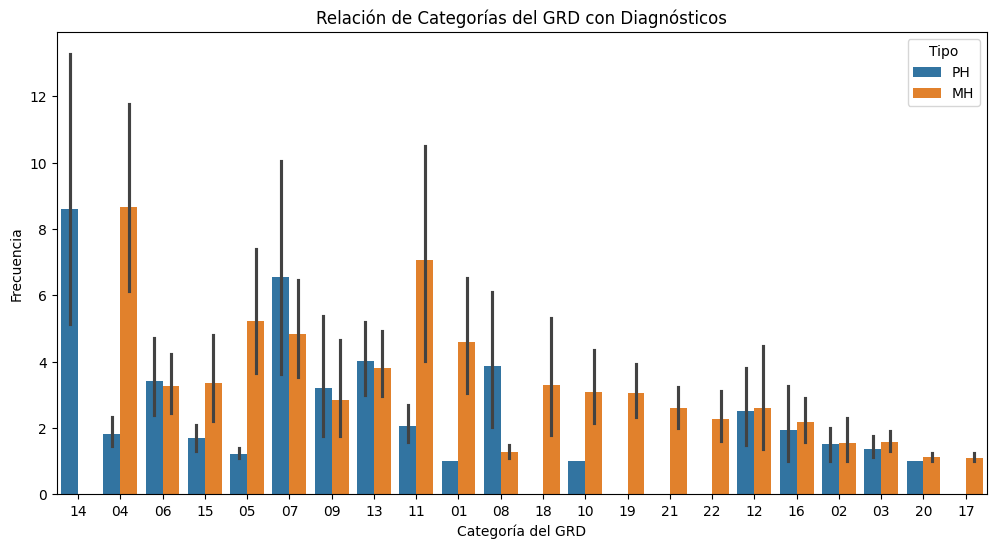

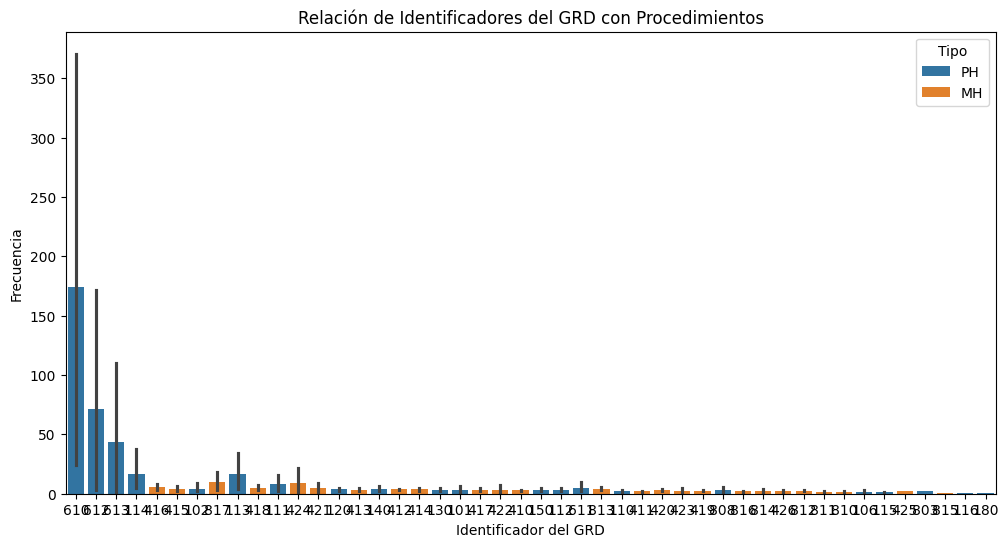

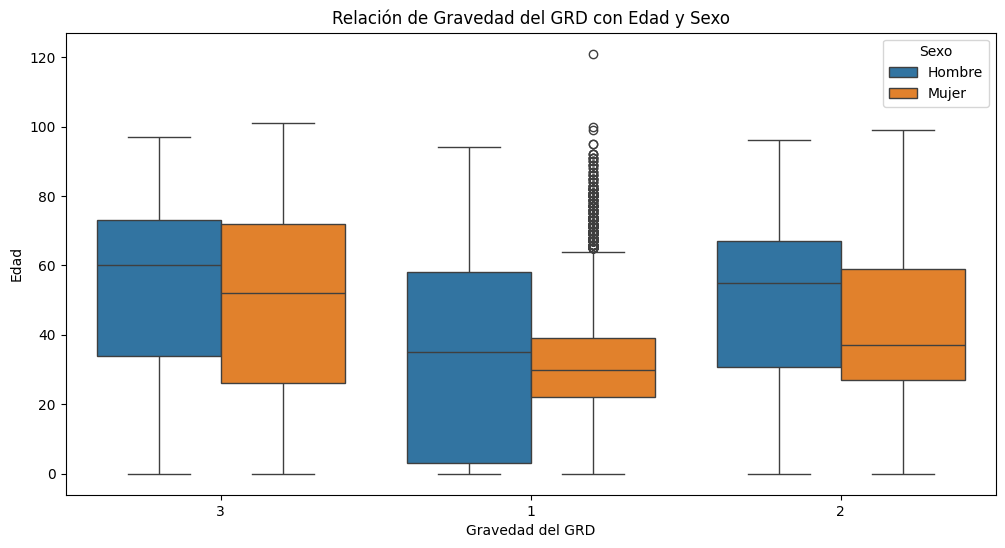

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

diag_vs_grd = df_grd.groupby(['Diag 01 Principal (cod+des)_Code', 'Categoria', 'Identificador', 'Gravedad', 'Tipo']).size().reset_index(name='Frecuencia')
diag_vs_grd = diag_vs_grd.sort_values(by='Frecuencia', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=diag_vs_grd, x='Categoria', y='Frecuencia', hue='Tipo')
plt.title("Relación de Categorías del GRD con Diagnósticos")
plt.xlabel("Categoría del GRD")
plt.ylabel("Frecuencia")
plt.legend(title="Tipo")
plt.show()

proc_vs_grd = df_grd.groupby(['Proced 01 Principal (cod+des)_Code', 'Categoria', 'Identificador', 'Gravedad', 'Tipo']).size().reset_index(name='Frecuencia')
proc_vs_grd = proc_vs_grd.sort_values(by='Frecuencia', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=proc_vs_grd, x='Identificador', y='Frecuencia', hue='Tipo')
plt.title("Relación de Identificadores del GRD con Procedimientos")
plt.xlabel("Identificador del GRD")
plt.ylabel("Frecuencia")
plt.legend(title="Tipo")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_grd, x='Gravedad', y='Edad en años', hue='Sexo (Desc)')
plt.title("Relación de Gravedad del GRD con Edad y Sexo")
plt.xlabel("Gravedad del GRD")
plt.ylabel("Edad")
plt.legend(title="Sexo")
plt.show()

In [31]:
###### Significancia

In [32]:
componentes = ['Categoria', 'Identificador', 'Gravedad', 'Tipo']
for comp in componentes:
    print(f"{comp}: {df_grd[comp].nunique()} valores únicos")

Categoria: 22 valores únicos
Identificador: 46 valores únicos
Gravedad: 3 valores únicos
Tipo: 2 valores únicos


In [33]:
from sklearn.feature_selection import mutual_info_classif

X = df_grd[['Categoria', 'Identificador', 'Gravedad', 'Tipo']]
y_diag = df_grd['Diag 01 Principal (cod+des)_Code']
y_proc = df_grd['Proced 01 Principal (cod+des)_Code']

X_encoded = pd.get_dummies(X, columns=X.columns)

info_diag = mutual_info_classif(X_encoded, y_diag, discrete_features=True)
info_proc = mutual_info_classif(X_encoded, y_proc, discrete_features=True)

print("Información mutua con Diagnósticos:")
for comp, score in zip(X.columns, info_diag):
    print(f"{comp}: {score:.4f}")

print("\nInformación mutua con Procedimientos:")
for comp, score in zip(X.columns, info_proc):
    print(f"{comp}: {score:.4f}")

Información mutua con Diagnósticos:
Categoria: 0.1605
Identificador: 0.0139
Gravedad: 0.0354
Tipo: 0.3538

Información mutua con Procedimientos:
Categoria: 0.1004
Identificador: 0.0058
Gravedad: 0.0152
Tipo: 0.2280


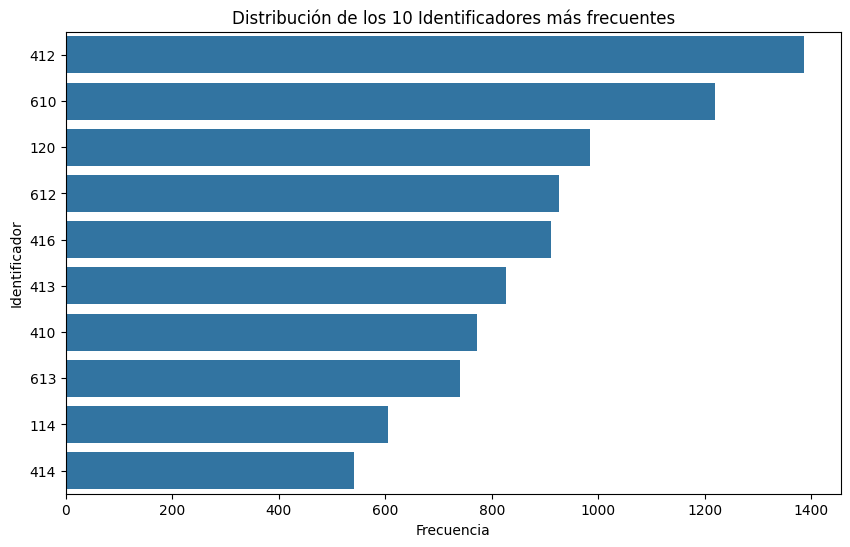

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_grd, y='Identificador', order=df_grd['Identificador'].value_counts().index[:10])
plt.title("Distribución de los 10 Identificadores más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Identificador")
plt.show()

In [35]:
###### Mejor identificado GRD

Identificador
412    1386
610    1220
120     984
612     927
416     911
413     827
410     772
613     741
114     605
414     542
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Identificadores más frecuentes'}, xlabel='Identificador'>

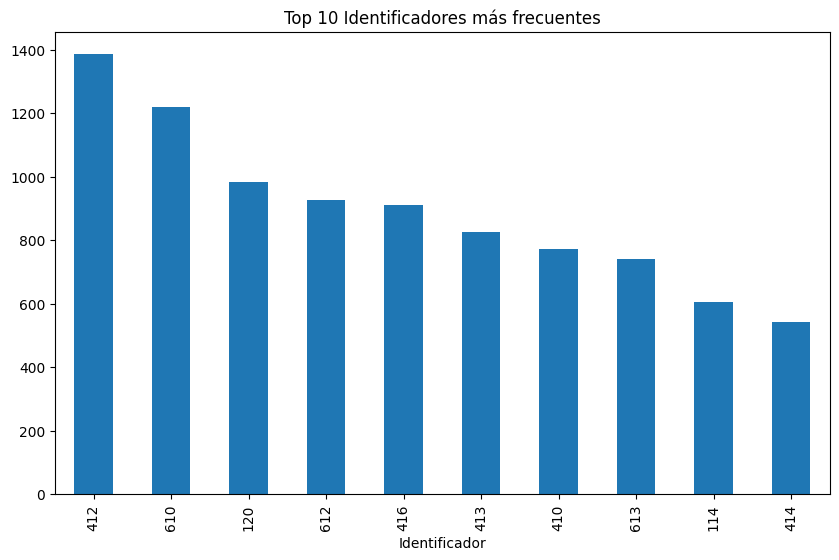

In [36]:
top_identificadores = df_grd['Identificador'].value_counts().head(10)
print(top_identificadores)
top_identificadores.plot(kind='bar', figsize=(10, 6), title="Top 10 Identificadores más frecuentes")

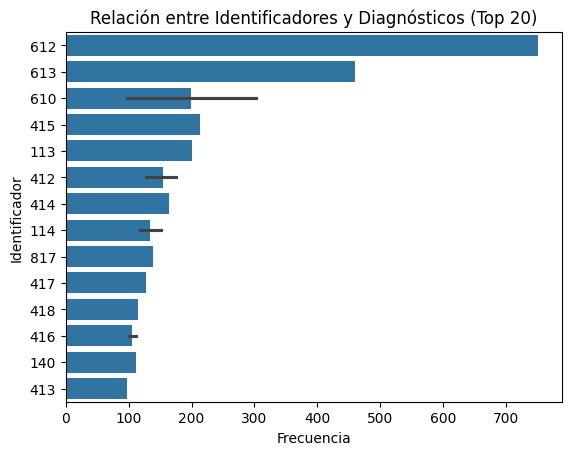

In [37]:
diag_vs_ident = df_grd.groupby(['Identificador', 'Diag 01 Principal (cod+des)_Code']).size().reset_index(name='Frecuencia')
diag_vs_ident = diag_vs_ident.sort_values(by='Frecuencia', ascending=False)

import seaborn as sns
sns.barplot(data=diag_vs_ident.head(20), x='Frecuencia', y='Identificador')
plt.title("Relación entre Identificadores y Diagnósticos (Top 20)")
plt.show()

In [38]:
from sklearn.feature_selection import mutual_info_classif

X = df_grd[['Diag 01 Principal (cod+des)_Code', 'Proced 01 Principal (cod+des)_Code', 
            'Edad en años', 'Sexo (Desc)']]
y = df_grd['Identificador']

X_encoded = pd.get_dummies(X, columns=['Diag 01 Principal (cod+des)_Code', 
                                       'Proced 01 Principal (cod+des)_Code', 
                                       'Sexo (Desc)'])

info_mutua = mutual_info_classif(X_encoded, y, discrete_features=True)

for feature, score in zip(X_encoded.columns, info_mutua):
    print(f"{feature}: {score:.4f}")

Edad en años: 0.6063
Diag 01 Principal (cod+des)_Code_A02.0: 0.0007
Diag 01 Principal (cod+des)_Code_A04.7: 0.0016
Diag 01 Principal (cod+des)_Code_A04.9: 0.0005
Diag 01 Principal (cod+des)_Code_A05.9: 0.0002
Diag 01 Principal (cod+des)_Code_A06.0: 0.0002
Diag 01 Principal (cod+des)_Code_A08.0: 0.0091
Diag 01 Principal (cod+des)_Code_A08.2: 0.0012
Diag 01 Principal (cod+des)_Code_A08.3: 0.0007
Diag 01 Principal (cod+des)_Code_A08.4: 0.0018
Diag 01 Principal (cod+des)_Code_A09.0: 0.0054
Diag 01 Principal (cod+des)_Code_A09.9: 0.0235
Diag 01 Principal (cod+des)_Code_A15.0: 0.0011
Diag 01 Principal (cod+des)_Code_A15.1: 0.0002
Diag 01 Principal (cod+des)_Code_A15.3: 0.0002
Diag 01 Principal (cod+des)_Code_A15.6: 0.0003
Diag 01 Principal (cod+des)_Code_A16.2: 0.0005
Diag 01 Principal (cod+des)_Code_A16.9: 0.0002
Diag 01 Principal (cod+des)_Code_A18.4: 0.0003
Diag 01 Principal (cod+des)_Code_A19.2: 0.0002
Diag 01 Principal (cod+des)_Code_A37.0: 0.0002
Diag 01 Principal (cod+des)_Code_A38: 0

                                      Variable  Importancia
0                                 Edad en años     0.606273
1830  Proced 01 Principal (cod+des)_Code_73.59     0.333936
1834   Proced 01 Principal (cod+des)_Code_74.1     0.284331
1008    Diag 01 Principal (cod+des)_Code_O70.0     0.170794
2020                        Sexo (Desc)_Hombre     0.127770
2021                         Sexo (Desc)_Mujer     0.127770
1661  Proced 01 Principal (cod+des)_Code_51.23     0.118482
1029    Diag 01 Principal (cod+des)_Code_O80.0     0.106491
1895  Proced 01 Principal (cod+des)_Code_87.03     0.086929
1903  Proced 01 Principal (cod+des)_Code_87.44     0.077885


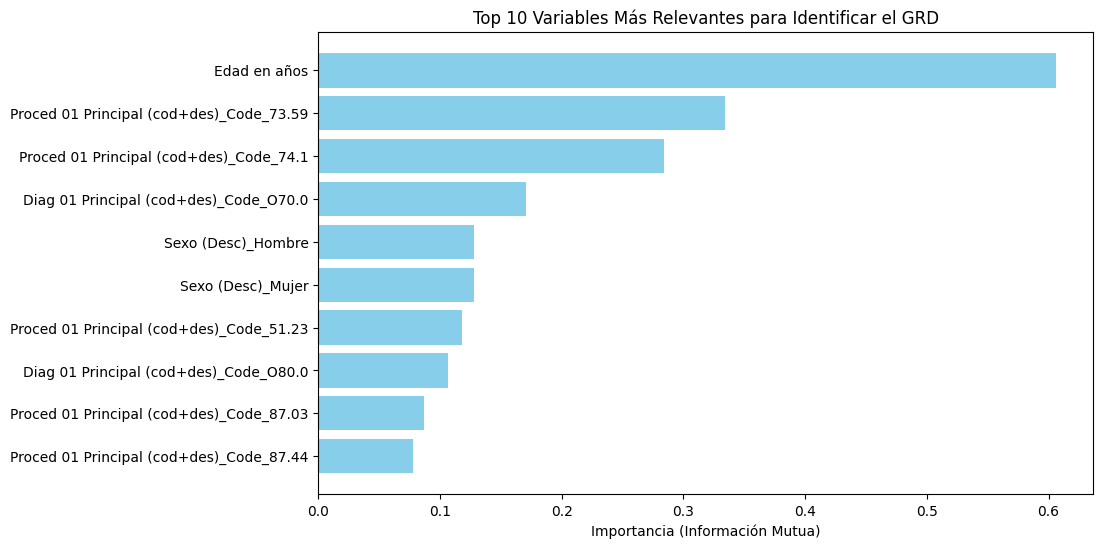

In [39]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df_grd[['Diag 01 Principal (cod+des)_Code', 'Proced 01 Principal (cod+des)_Code', 
            'Edad en años', 'Sexo (Desc)']]
y = df_grd['Identificador']

X_encoded = pd.get_dummies(X, columns=['Diag 01 Principal (cod+des)_Code', 
                                       'Proced 01 Principal (cod+des)_Code', 
                                       'Sexo (Desc)'])

info_mutua = mutual_info_classif(X_encoded, y, discrete_features=True)

importancia_features = pd.DataFrame({
    'Variable': X_encoded.columns,
    'Importancia': info_mutua
}).sort_values(by='Importancia', ascending=False)

top_10_variables = importancia_features.head(10)
print(top_10_variables)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_variables['Variable'], top_10_variables['Importancia'], color='skyblue')
plt.xlabel("Importancia (Información Mutua)")
plt.title("Top 10 Variables Más Relevantes para Identificar el GRD")
plt.gca().invert_yaxis()
plt.show()

In [40]:
###### Modelo inicial

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [48]:
# Lista de características importantes identificadas previamente
top_features = [
    'Edad en años', 
    'Proced 01 Principal (cod+des)_Code_73.59',
    'Proced 01 Principal (cod+des)_Code_74.1',
    'Sexo (Desc)_Hombre', 
    'Sexo (Desc)_Mujer'
]

# Imprime las columnas disponibles en tu DataFrame codificado
print(X_encoded.columns.tolist())

['Edad en años', 'Diag 01 Principal (cod+des)_Code_A02.0', 'Diag 01 Principal (cod+des)_Code_A04.7', 'Diag 01 Principal (cod+des)_Code_A04.9', 'Diag 01 Principal (cod+des)_Code_A05.9', 'Diag 01 Principal (cod+des)_Code_A06.0', 'Diag 01 Principal (cod+des)_Code_A08.0', 'Diag 01 Principal (cod+des)_Code_A08.2', 'Diag 01 Principal (cod+des)_Code_A08.3', 'Diag 01 Principal (cod+des)_Code_A08.4', 'Diag 01 Principal (cod+des)_Code_A09.0', 'Diag 01 Principal (cod+des)_Code_A09.9', 'Diag 01 Principal (cod+des)_Code_A15.0', 'Diag 01 Principal (cod+des)_Code_A15.1', 'Diag 01 Principal (cod+des)_Code_A15.3', 'Diag 01 Principal (cod+des)_Code_A15.6', 'Diag 01 Principal (cod+des)_Code_A16.2', 'Diag 01 Principal (cod+des)_Code_A16.9', 'Diag 01 Principal (cod+des)_Code_A18.4', 'Diag 01 Principal (cod+des)_Code_A19.2', 'Diag 01 Principal (cod+des)_Code_A37.0', 'Diag 01 Principal (cod+des)_Code_A38', 'Diag 01 Principal (cod+des)_Code_A41.0', 'Diag 01 Principal (cod+des)_Code_A41.1', 'Diag 01 Principal 

In [49]:
# Filtrar las columnas que existen en X_encoded
top_features_disponibles = [col for col in top_features if col in X_encoded.columns]
print("Características disponibles para el modelo:", top_features_disponibles)

Características disponibles para el modelo: ['Edad en años', 'Proced 01 Principal (cod+des)_Code_73.59', 'Proced 01 Principal (cod+des)_Code_74.1', 'Sexo (Desc)_Hombre', 'Sexo (Desc)_Mujer']


In [50]:
# Seleccionar características (X) y la variable objetivo (y)
X = X_encoded[top_features_disponibles]
y = df_grd['Identificador']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))
print("Pesos calculados para las clases:", weights)

Pesos calculados para las clases: {'101': 4.243351548269581, '102': 0.9310951239008793, '106': 64.71111111111111, '110': 2.9414141414141413, '111': 1.0150762527233115, '112': 2.641269841269841, '113': 0.9050505050505051, '114': 0.5282539682539683, '115': 32.355555555555554, '116': 129.42222222222222, '120': 0.32074900178989396, '130': 0.889499809087438, '140': 1.2565264293419633, '150': 1.8101010101010102, '180': 258.84444444444443, '410': 0.42088527551942184, '411': 0.8063689858082381, '412': 0.23682016875063536, '413': 0.39278367897487776, '414': 0.6047767393561786, '415': 0.6237215528781794, '416': 0.3585103108648815, '417': 0.7481053307642903, '418': 0.6520011195074167, '419': 2.6684994272623137, '420': 2.614590347923681, '421': 1.1607374190333832, '422': 4.541130604288499, '423': 8.088888888888889, '424': 1.9461988304093567, '425': 258.84444444444443, '426': 18.488888888888887, '610': 0.2552706552706553, '611': 6.637037037037037, '612': 0.344666370764906, '613': 0.4455153949129852

In [52]:
# Crear y entrenar el modelo
model = RandomForestClassifier(class_weight=weights, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         101       0.01      0.11      0.03        18
         102       0.06      0.04      0.05        72
         106       0.00      0.00      0.00         1
         110       0.04      0.30      0.06        20
         111       0.10      0.37      0.16        71
         112       0.00      0.00      0.00        28
         113       0.06      0.09      0.07        64
         114       0.00      0.00      0.00       115
         115       0.00      0.00      0.00         1
         116       0.00      0.00      0.00         0
         120       0.00      0.00      0.00       177
         130       0.06      0.05      0.06        82
         140       0.02      0.04      0.03        50
         150       0.02      0.06      0.03        34
         180       0.00      0.00      0.00         2
         410       0.50      0.02      0.04       157
         411       0.05      0.04      0.04        78
         412       0.00    

C:\Users\Rodrigo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodrigo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodrigo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"